### Look at models to look at disadvantaged pupils, non-disadvantages pupils and overall

As the progress 8 measue for disadvantaged pupils is pretty much explained by all he factors i considered, lets look at predicting whether a school's score based on the percentage of disadvantaged pupils.

response P8 score < 1, non _ progress 8 score >= 0
factors:

    % fsm
    prior attainment at KS2
    Number of pupils on roll

In [2]:
#import the data
#add relevant libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numbers as nd
#printing of multiple outputs from a cell
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [3]:
#read in dataframes from csv
!curl https://raw.githubusercontent.com/Trakky1/Notes_DAT17/master/ks4_meta_subset.csv -o ks4_meta_subset.csv
df_census=pd.read_csv('Census_DataFrame.csv')
df_ks4=pd.read_csv('KS4_DataFrame.csv')
ks4_meta_subset=pd.read_csv('ks4_meta_subset.csv', na_values=['NP',' ','SUPP','NE','LOWCOV',None])

Axes(0.125,0.125;0.62x0.755)


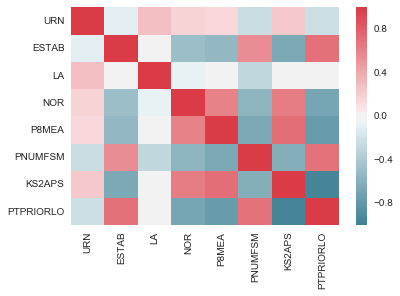

In [5]:
#make dataframe with columns I want to include in model
sns.set_style("darkgrid")
cmap = sns.diverging_palette(220, 10, as_cmap=True)

cols_to_keep=['URN','ESTAB','LA','NOR','P8MEA','PNUMFSM','KS2APS','PTPRIORLO']
df_P8Data = df_ks4[cols_to_keep]

#lets look at correlations
correlations=df_P8Data.corr()
print sns.heatmap(correlations, cmap=cmap)

Some correlations here but should be intersting

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D89C6A0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E725CF8>]], dtype=object)

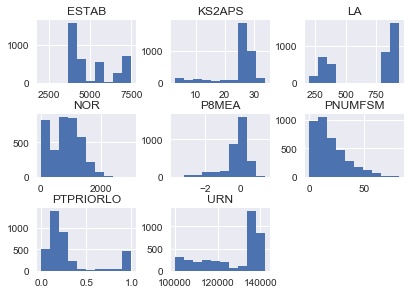

In [6]:
import pylab as pl
#ref: https://matplotlib.org/users/pyplot_tutorial.html

df_P8Data.hist()
plt.subplots_adjust(top=0.95, bottom=0.08, left=0.10, right=0.95, hspace=0.50,
                    wspace=0.35)
pl.show()

In [7]:
#now rearrange the data and code the P8 measure, first look at it's summary
df_P8Data['P8MEA'].describe()

count    3450.000000
mean       -0.222386
std         0.710957
min        -3.660000
25%        -0.360000
50%        -0.045000
75%         0.200000
max         1.370000
Name: P8MEA, dtype: float64

Take the median -0.045 as the cutoff point for low performing and high performing, and code the P8 measure accordingly.

In [11]:
#function to group P8 score
import numbers as num
from numbers import Number


def GpP8(frame,col):
    lst = list()  #initialise list
    for c in frame[col]:
        if isinstance(c, num.Number)== False:
            lst.append(c) 
        else:
            if c< -0.045:
                lst.append(1) 
            else:
                lst.append(0)
    return lst


In [13]:
P8Code = GpP8(df_P8Data,'P8MEA')
df_P8Data['P8Code']=P8Code
df_P8Data.head()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,URN,ESTAB,LA,NOR,P8MEA,PNUMFSM,KS2APS,PTPRIORLO,P8Code
0,100049,4104,202,1227,-0.11,40.4,26.5,0.20,1
1,100050,4166,202,1114,0.18,27.8,28.6,0.11,0
2,100051,4196,202,831,-0.15,38.2,25.6,0.25,1
3,100052,4275,202,1205,0.09,22.8,26.8,0.26,0
4,100053,4285,202,974,-0.26,27.3,28.3,0.13,1


In [14]:
df_P8Data.dropna(subset=['P8MEA'], inplace=True)
df_P8Data.isnull().sum()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


URN          0
ESTAB        0
LA           0
NOR          0
P8MEA        0
PNUMFSM      0
KS2APS       0
PTPRIORLO    0
P8Code       0
dtype: int64

In [21]:
df_P8Data.shape
df_P8Data['intercept'] = 1.0

(3450, 9)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [18]:
y=df_P8Data['P8Code']
X=df_P8Data[['LA','NOR','P8MEA','PNUMFSM','KS2APS','PTPRIORLO']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=5)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(2311, 6)
(1139, 6)
(2311L,)
(1139L,)


In [20]:
logit = sm.Logit(y_train,X_train)
result = logit.fit()

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\discrete\discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


PerfectSeparationError: Perfect separation detected, results not available

In [25]:
#try skilearn
from sklearn.linear_model import LogisticRegression


In [26]:
lm = LogisticRegression()

In [28]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
# Coefficients represent the log-odds. This includes the y-intercept. 
print lm.coef_
print lm.intercept_
print y_train.mean()

[[  2.41533990e-04  -1.17799965e-04  -1.38841702e+01   1.19787858e-02
   -4.15800192e-02   3.73114456e-02]]
[ 0.22161367]
0.500216356556


In [31]:
print np.exp(lm.coef_)
print np.exp(lm.intercept_)
print y_train.mean()

[[  1.00024156e+00   9.99882207e-01   9.33644369e-07   1.01205082e+00
    9.59272572e-01   1.03801626e+00]]
[ 1.24808912]
0.500216356556


In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

In [33]:
feature_set = X_train
print lm.score(feature_set, y_train)

0.991345737776


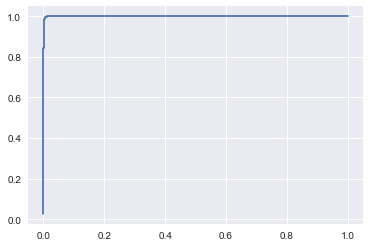

In [34]:
actuals = lm.predict(feature_set) 
probas = lm.predict_proba(feature_set)
plt.plot(roc_curve(y_train, probas[:,1])[0], roc_curve(y_train, probas[:,1])[1])

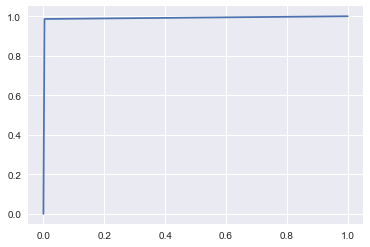

In [35]:
plt.plot(roc_curve(y_train, actuals)[0], roc_curve(y_train, actuals)[1])

In [36]:
roc_auc_score(y_train, lm.predict(feature_set))

0.9913479830434847

In [37]:
#I think i may well be overfitting with too many variables lose the P8MEASure
X=df_P8Data[['LA','NOR','PNUMFSM','KS2APS','PTPRIORLO']]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=5)
lm.fit(X_train,y_train)
print np.exp(lm.coef_)
print np.exp(lm.intercept_)
print y_train.mean()
feature_set = X_train
print lm.score(feature_set, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

[[ 1.00109241  0.99927564  1.05172372  0.91076195  3.47995615]]
[ 3.78628725]
0.500216356556
0.683254002596


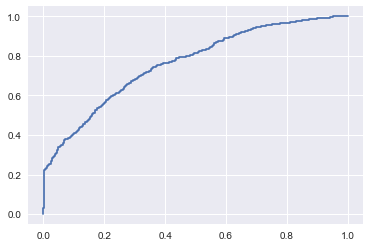

In [39]:
actuals = lm.predict(feature_set) 
probas = lm.predict_proba(feature_set)
plt.plot(roc_curve(y_train, probas[:,1])[0], roc_curve(y_train, probas[:,1])[1])

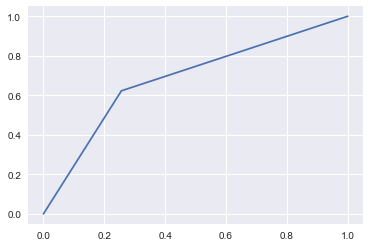

In [40]:
plt.plot(roc_curve(y_train, actuals)[0], roc_curve(y_train, actuals)[1])

In [41]:
roc_auc_score(y_train, lm.predict(feature_set))

0.68328015698257916

In [42]:
from sklearn import grid_search, cross_validation

feature_set = X_train
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'auto']},
    cv=cross_validation.KFold(n=len(X_train), n_folds=10),
    scoring='roc_auc'
)

### print out the estimates for weighting paarmeters
gs.fit(feature_set, y_train)
gs.grid_scores_
#print gs.best_estimator_

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
C:\Pro

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='b

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='b

GridSearchCV(cv=sklearn.cross_validation.KFold(n=2311, n_folds=10, shuffle=False, random_state=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001], 'class_weight': [None, 'auto']},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

[mean: 0.76207, std: 0.02591, params: {'C': 100000, 'class_weight': None},
 mean: 0.76146, std: 0.02581, params: {'C': 100000, 'class_weight': 'auto'},
 mean: 0.76182, std: 0.02623, params: {'C': 10000, 'class_weight': None},
 mean: 0.76131, std: 0.02617, params: {'C': 10000, 'class_weight': 'auto'},
 mean: 0.76138, std: 0.02617, params: {'C': 1000, 'class_weight': None},
 mean: 0.76130, std: 0.02617, params: {'C': 1000, 'class_weight': 'auto'},
 mean: 0.76181, std: 0.02620, params: {'C': 100, 'class_weight': None},
 mean: 0.76131, std: 0.02620, params: {'C': 100, 'class_weight': 'auto'},
 mean: 0.76196, std: 0.02612, params: {'C': 10, 'class_weight': None},
 mean: 0.76158, std: 0.02605, params: {'C': 10, 'class_weight': 'auto'},
 mean: 0.76280, std: 0.02556, params: {'C': 1, 'class_weight': None},
 mean: 0.76272, std: 0.02550, params: {'C': 1, 'class_weight': 'auto'},
 mean: 0.76503, std: 0.02398, params: {'C': 0.1, 'class_weight': None},
 mean: 0.76500, std: 0.02397, params: {'C': 0.

In [43]:
print gs.best_estimator_

LogisticRegression(C=0.01, class_weight='auto', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


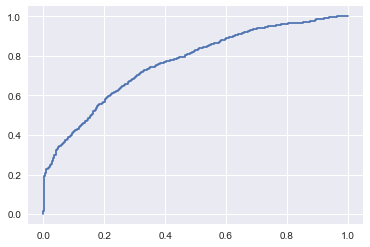

In [44]:
actuals = gs.predict(feature_set) 
probas = gs.predict_proba(feature_set)
plt.plot(roc_curve(y_train, probas[:,1])[0], roc_curve(y_train, probas[:,1])[1])

In [45]:
roc_auc_score(y_train, gs.predict(feature_set))

0.69107536062553376

In [49]:
from sklearn.metrics import classification_report

y_true, y_pred = y_test, gs.predict(X_test)
    
print(classification_report(y_true, y_pred))
print()

             precision    recall  f1-score   support

          0       0.67      0.76      0.72       570
          1       0.73      0.63      0.68       569

avg / total       0.70      0.70      0.70      1139

()
